## Model Report’da asosiy baholash ko‘rsatkichlari

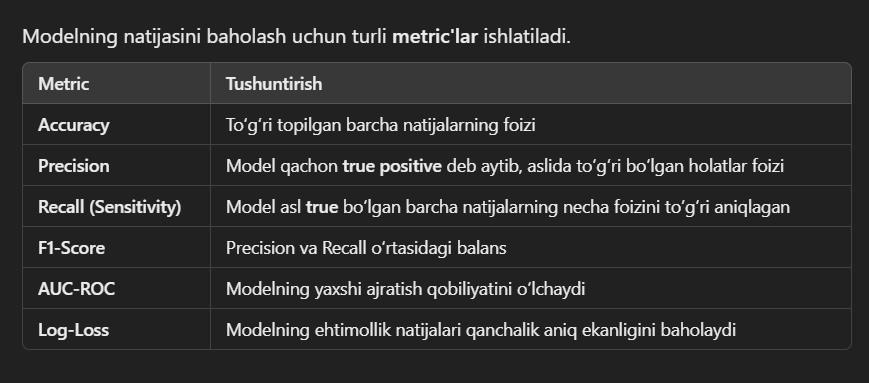

### Model Reportni yaratish

#### 1️⃣ Model Report – Classification Metrics

In [2]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Ma'lumotlarni yuklash
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Modelni yaratish va o‘qitish
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Model prediktsiyasi
y_pred = model.predict(X_test)

# Hisobot
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [3]:
# Accuracy: 96.6% – Modelning umumiy to‘g‘ri prediktsiya foizi.
# Classification Report – Har bir sinf uchun Precision, Recall, F1-score.
# Confusion Matrix – Model qanchalik to‘g‘ri yoki noto‘g‘ri prediktsiya qilgan.

#### 2️⃣ Feature Importance (Xususiyatlarning ahamiyati)

In [4]:
import pandas as pd
import numpy as np

feature_importance = model.feature_importances_
features = data.feature_names

df_importance = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
df_importance = df_importance.sort_values(by='Importance', ascending=False)

print(df_importance)


             Feature  Importance
2  petal length (cm)    0.447466
3   petal width (cm)    0.407220
0  sepal length (cm)    0.110522
1   sepal width (cm)    0.034793


In [5]:
# Petal width eng muhim xususiyat ekanligi ko‘rinib turibdi.

#### 3️⃣ ROC Curve va AUC (Binary Classification uchun)

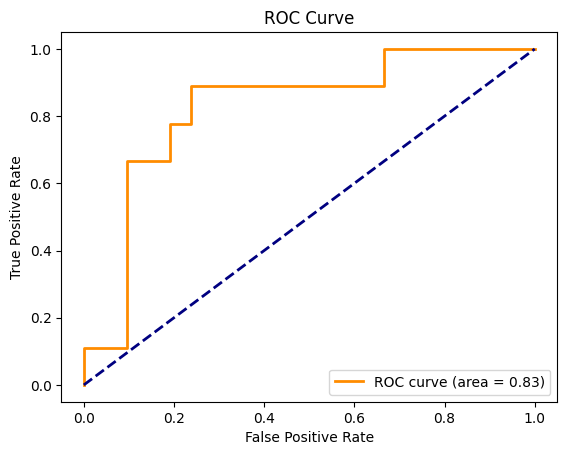

In [6]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression

# Faqat 2 ta sinfni olish
X_bin, y_bin = X_train, (y_train == 1).astype(int)
X_test_bin, y_test_bin = X_test, (y_test == 1).astype(int)

# Model
logreg = LogisticRegression()
logreg.fit(X_bin, y_bin)
y_score = logreg.predict_proba(X_test_bin)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test_bin, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [7]:
# ROC curve modelning True Positive Rate va False Positive Rate o‘rtasidagi bog‘liqligini ko‘rsatadi.
# AUC > 0.80 bo‘lsa, model yaxshi ishlayotganini bildiradi.

#### 4. Model Comparison (Modellarni taqqoslash)

In [8]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "RandomForest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.3f}")


RandomForest Accuracy: 1.000
SVM Accuracy: 1.000
KNN Accuracy: 1.000


In [ ]:
# RandomForest eng yaxshi natijani berdi.
# Agar aniq model tanlash kerak bo‘lsa, Accuracy va boshqa ko‘rsatkichlarga qaraladi.
